In [222]:
from functools import cache
import pandas as pd
pd.set_option('display.max_columns', None)

In [223]:
@cache
def get_dataset_for(year):
    return pd.read_csv(f"datasets/sinac{year}DatosAbiertos.csv", dtype=object)

In [224]:
_df = get_dataset_for(2013)

In [241]:
estados_mexicanos ={'AGUASCALIENTES',
 'BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'CAMPECHE',
 'CHIAPAS',
 'CHIHUAHUA',
 'COAHUILA DE ZARAGOZA',
 'COLIMA',
 'DISTRITO FEDERAL',
 'DURANGO',
 'GUANAJUATO',
 'GUERRERO',
 'HIDALGO',
 'JALISCO',
 'MEXICO',
 'MICHOACAN DE OCAMPO',
 'MORELOS',
 'NAYARIT',
 'NUEVO LEON',
 'OAXACA',
 'PUEBLA',
 'QUERETARO  DE ARTEAGA',
 'QUINTANA ROO',
 'SAN LUIS POTOSI',
 'SINALOA',
 'SONORA',
 'TABASCO',
 'TAMAULIPAS',
 'TLAXCALA',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'YUCATAN',
 'ZACATECAS'}

In [225]:
_df.sample(n=20)

edo_captura                    edo_nac_madre  \
1921658                       TAMAULIPAS  VERACRUZ DE IGNACIO DE LA LLAVE   
2120706  VERACRUZ DE IGNACIO DE LA LLAVE  VERACRUZ DE IGNACIO DE LA LLAVE   
208694                           CHIAPAS                          CHIAPAS   
1181864                           MEXICO                 DISTRITO FEDERAL   
1719391                  SAN LUIS POTOSI                  SAN LUIS POTOSI   
1770740                          SINALOA                          SINALOA   
1541814                          MORELOS                           PUEBLA   
476524                           DURANGO                          DURANGO   
1031734                 DISTRITO FEDERAL                 DISTRITO FEDERAL   
640165                          GUERRERO                         GUERRERO   
853491                           JALISCO                          JALISCO   
310935                         CHIHUAHUA                        CHIHUAHUA   
1614190  VERACRUZ DE IGNACIO DE LA LLAVE                           PUEBLA   
1439899                           PUEBLA                           OAXACA   
1518822                           PUEBLA                           PUEBLA   
1885809                          TABASCO                          TABASCO   
226340                           CHIAPAS                          CHIAPAS   
1490                      AGUASCALIENTES                   AGUASCALIENTES   
71323                    BAJA CALIFORNIA                  BAJA CALIFORNIA   
1672856                     QUINTANA ROO                     QUINTANA ROO   

                      mpo_nac_madre fecha_nac_madre edad_madre  \
1921658                   TANTOYUCA      12/04/1989         24   
2120706                 TRES VALLES      12/03/1992         21   
208694         COMITAN DE DOMINGUEZ      08/05/1991         22   
1181864                  CUAUHTEMOC      30/07/1983         29   
1719391             SAN LUIS POTOSI      19/06/1993         19   
1770740                    CULIACAN      11/09/1986         26   
1541814                    JOLALPAN      18/08/1973         40   
476524                      DURANGO      28/01/1998         15   
1031734             NO ESPECIFICADO      22/10/1977         35   
640165           ACAPULCO DE JUAREZ      08/01/1992         21   
853491                  GUADALAJARA      16/06/1995         18   
310935                       JUAREZ      09/09/1984         28   
1614190                   TEZIUTLAN      23/05/1988         24   
1439899  SAN JUAN BAUTISTA TUXTEPEC      30/01/1980         33   
1518822                      CALPAN      07/07/1986         27   
1885809             JALPA DE MENDEZ      12/12/1992         20   
226340                   ACAPETAHUA      25/08/1992         21   
1490                 AGUASCALIENTES      09/05/1996         17   
71323                      MEXICALI      03/07/1992         20   
1672856                     COZUMEL      18/01/1996         17   

        estado_conyugal         entidad_residencia_madre  \
1921658     UNIÓN LIBRE                       TAMAULIPAS   
2120706          CASADA  VERACRUZ DE IGNACIO DE LA LLAVE   
208694           CASADA                          CHIAPAS   
1181864         SOLTERA                           MEXICO   
1719391     UNIÓN LIBRE                  SAN LUIS POTOSI   
1770740          CASADA                          SINALOA   
1541814          CASADA                           PUEBLA   
476524      UNIÓN LIBRE                          DURANGO   
1031734          CASADA                           MEXICO   
640165      UNIÓN LIBRE                         GUERRERO   
853491      UNIÓN LIBRE                          JALISCO   
310935      UNIÓN LIBRE                        CHIHUAHUA   
1614190     UNIÓN LIBRE                           PUEBLA   
1439899          CASADA                           OAXACA   
1518822     UNIÓN LIBRE                           PUEBLA   
1885809     UNIÓN LIBRE                          TABASCO   
2263

In [38]:
columns = ["ENTIDAD_NACMAD", "FECH_NACM", "ESTADO_CIVIL", "ENTIDAD_RESMAD", "NUMERO_EMBARAZOS", "NACIDOS_MUERTOS", "NACIDOS_VIVOS", "SOBREVIVIENTES", "ANTERIOR_NACIO", "VIVE_AUN", "ORDEN_NAC", "ATENCION_PRENA", "TRIMESTR_ATEN", "SOBREVIVIO_PARTO", "ESCOLARIDAD", "DESC_OCUPHAB", "OCUPACION_HABITUAL", "TRABAJA_ACTUALMENTE", "FECH_NACH", "HORA_NACH", "SEXO_RN", "GESTACH", "TALLAH", "PESOH", "APGARH", "SILVERMAN", "NACIMIENTOS", "MES_NACI", "Producto", "CIE10", "CIE10_2da", "PROCEDIMIENTO", "OTRO_PROCEDIMIENTO", "LUGAR_NACIM", "ENTIDAD_NACIM", "ENTIDAD_CERTIF", "FECHA_CERTIF",]
columns = [x.lower() for x in columns]

In [39]:
len(set(columns) - set(df.columns.to_list()))

35

In [218]:
columns_original = get_dataset_for(2013).columns.to_list()
columns_selected = [
    'edo_captura', 'edo_nac_madre', 'fecha_nac_madre', 'edad_madre', 'estado_conyugal', 'entidad_residencia_madre', 'numero_embarazos', 'hijos_nacidos_muertos', 'hijos_nacidos_vivos', 'hijos_sobrevivientes', 'el_hijo_anterior_nacio', 'vive_aun_hijo_anterior', 'orden_nacimiento', 'recibio_atencion_prenatal', 'trimestre_recibio_primera_consulta', 'total_consultas_recibidas', 'madre_sobrevivio_al_parto', 'escolaridad_madre', 'ocupacion_habitual_madre', 'trabaja_actualmente', 'fecha_nacimiento_nac_vivo', 'hora_nacimiento_nac_vivo', 'sexo_nac_vivo', 'semanas_gestacion_nac_vivo', 'talla_nac_vivo', 'peso_nac_vivo', 'valoracion_apgar_nac_vivo', 'valoracion_silverman_nac_vivo', 'producto_de_un_embarazo', 'anomalia_congenita_nac_vivo', 'lugar_de_nacimiento', 'entidad_nacimiento', 'entidad_certifico',]
print(" - ", end="")
print(*sorted(columns_selected), sep="\n - ")
len(columns_selected)

 - anomalia_congenita_nac_vivo
 - edad_madre
 - edo_captura
 - edo_nac_madre
 - el_hijo_anterior_nacio
 - entidad_certifico
 - entidad_nacimiento
 - entidad_residencia_madre
 - escolaridad_madre
 - estado_conyugal
 - fecha_nac_madre
 - fecha_nacimiento_nac_vivo
 - hijos_nacidos_muertos
 - hijos_nacidos_vivos
 - hijos_sobrevivientes
 - hora_nacimiento_nac_vivo
 - lugar_de_nacimiento
 - madre_sobrevivio_al_parto
 - numero_embarazos
 - ocupacion_habitual_madre
 - orden_nacimiento
 - peso_nac_vivo
 - producto_de_un_embarazo
 - recibio_atencion_prenatal
 - semanas_gestacion_nac_vivo
 - sexo_nac_vivo
 - talla_nac_vivo
 - total_consultas_recibidas
 - trabaja_actualmente
 - trimestre_recibio_primera_consulta
 - valoracion_apgar_nac_vivo
 - valoracion_silverman_nac_vivo
 - vive_aun_hijo_anterior


33

In [207]:
print("Año - #Cols - #Faltantes")
for year in range(2010, 2020):
    df = get_dataset_for(year)
    columns = set(df.columns.to_list())
    print(year, " - ", len(columns), " - ", len(set(columns_selected) - columns))

Año - #Cols - #Faltantes
2010  -  57  -  0
2011  -  57  -  0
2012  -  57  -  0
2013  -  57  -  0
2014  -  57  -  0
2015  -  61  -  0
2016  -  61  -  0
2017  -  77  -  33
2018  -  77  -  33
2019  -  76  -  33


In [210]:
df = pd.concat([get_dataset_for(year)[columns_selected] for year in range(2010, 2017)])

In [211]:
def _ano_nacimiento_vivo_func(str_date):
    try:
        return str_date.split("/")[-1]
    except:
        return ""

df["año_de_nacimiento_vivo"] = df["fecha_nacimiento_nac_vivo"].apply(_ano_nacimiento_vivo_func)
df = df[df.edad_madre < 120]

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15003237 entries, 0 to 2080252
Data columns (total 34 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   edo_captura                         object
 1   edo_nac_madre                       object
 2   fecha_nac_madre                     object
 3   edad_madre                          int64 
 4   estado_conyugal                     object
 5   entidad_residencia_madre            object
 6   numero_embarazos                    int64 
 7   hijos_nacidos_muertos               int64 
 8   hijos_nacidos_vivos                 int64 
 9   hijos_sobrevivientes                int64 
 10  el_hijo_anterior_nacio              object
 11  vive_aun_hijo_anterior              object
 12  orden_nacimiento                    int64 
 13  recibio_atencion_prenatal           object
 14  trimestre_recibio_primera_consulta  object
 15  total_consultas_recibidas           int64 
 16  madre_sobrevivio_al_pa

# Agrupación por estado lugar de nacimiento de la madre, y año del registro, agregación de edad de la madre

In [230]:
consulta = df.groupby(
    ["edo_captura", "edo_nac_madre", "año_de_nacimiento_vivo"]
).agg({
    "edad_madre": ["count", "mean", "std", "min", "max", ],
})

In [231]:
[row_name for row_name in consulta.index.to_list() if row_name[0] == "JALISCO"]

[('JALISCO', 'AGUASCALIENTES', '2010'),
 ('JALISCO', 'AGUASCALIENTES', '2011'),
 ('JALISCO', 'AGUASCALIENTES', '2012'),
 ('JALISCO', 'AGUASCALIENTES', '2013'),
 ('JALISCO', 'AGUASCALIENTES', '2014'),
 ('JALISCO', 'AGUASCALIENTES', '2015'),
 ('JALISCO', 'AGUASCALIENTES', '2016'),
 ('JALISCO', 'BAJA CALIFORNIA', '2010'),
 ('JALISCO', 'BAJA CALIFORNIA', '2011'),
 ('JALISCO', 'BAJA CALIFORNIA', '2012'),
 ('JALISCO', 'BAJA CALIFORNIA', '2013'),
 ('JALISCO', 'BAJA CALIFORNIA', '2014'),
 ('JALISCO', 'BAJA CALIFORNIA', '2015'),
 ('JALISCO', 'BAJA CALIFORNIA', '2016'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2010'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2011'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2012'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2013'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2014'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2015'),
 ('JALISCO', 'BAJA CALIFORNIA SUR', '2016'),
 ('JALISCO', 'CAMPECHE', '2010'),
 ('JALISCO', 'CAMPECHE', '2011'),
 ('JALISCO', 'CAMPECHE', '2012'),
 ('JALISCO', 'CA

In [232]:
edos_fronterizos = {
    "BAJA CALIFORNIA", "SONORA", "CHIHUAHUA", "COAHUILA DE ZARAGOZA", "NUEVO LEON", "TAMAULIPAS"
}

In [233]:
edo_nac_madre_de_interes = {"ESTADOS UNIDOS DE NORTEAMERICA", "OTROS PAISES"} # "OTROS PAISES DE LATINOAMERICA"}
consulta_edo_madre_especifico = consulta.loc[[row_name
    for row_name in consulta.index.to_list()
    if row_name[1] in edo_nac_madre_de_interes
    # and row_name[0] in edos_fronterizos
]]

In [234]:
# consulta_edo_madre_especifico.index, consulta_edo_madre_especifico.columns

In [235]:
%matplotlib notebook
from matplotlib.figure import Figure

In [236]:
{x[0] for x in consulta_edo_madre_especifico.index.to_list()}

{'AGUASCALIENTES',
 'BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'CAMPECHE',
 'CHIAPAS',
 'CHIHUAHUA',
 'COAHUILA DE ZARAGOZA',
 'COLIMA',
 'DISTRITO FEDERAL',
 'DURANGO',
 'GUANAJUATO',
 'GUERRERO',
 'HIDALGO',
 'JALISCO',
 'MEXICO',
 'MICHOACAN DE OCAMPO',
 'MORELOS',
 'NAYARIT',
 'NUEVO LEON',
 'OAXACA',
 'PUEBLA',
 'QUERETARO  DE ARTEAGA',
 'QUINTANA ROO',
 'SAN LUIS POTOSI',
 'SINALOA',
 'SONORA',
 'TABASCO',
 'TAMAULIPAS',
 'TLAXCALA',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'YUCATAN',
 'ZACATECAS'}

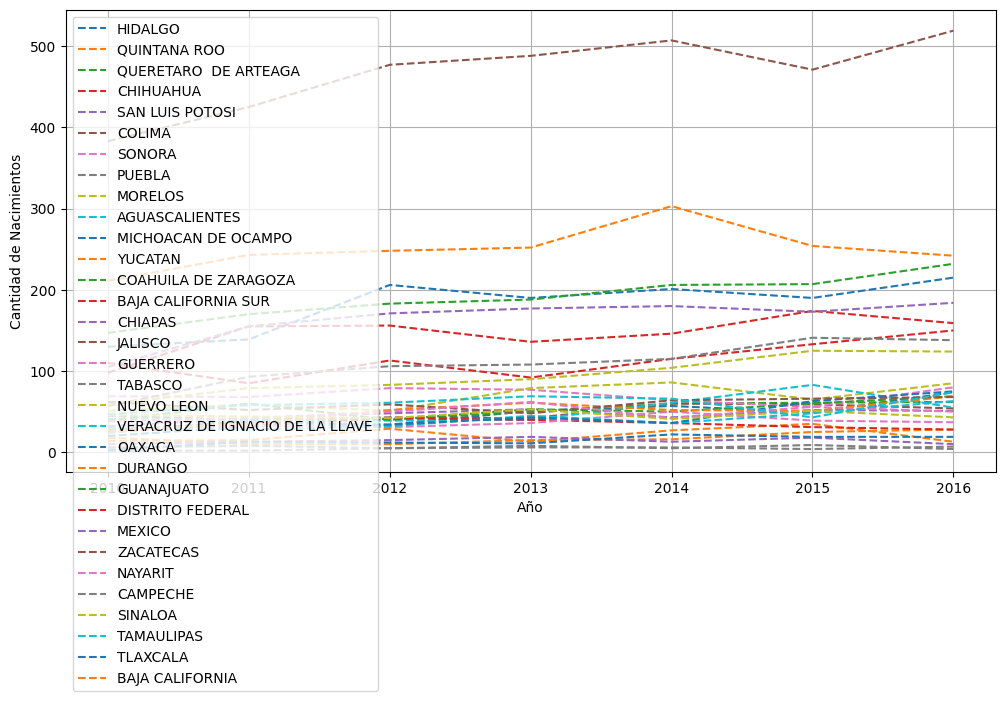

In [229]:
fig = Figure(figsize=(12, 6))
ax = fig.add_subplot()
edo_nac_madre_deseado = "ESTADOS UNIDOS DE NORTEAMERICA"
_df = consulta_edo_madre_especifico.reset_index()
edo = "BAJA CALIFORNIA"
for edo in {x[0] for x in consulta_edo_madre_especifico.index.to_list()}:
    _to_plot = _df[
        (_df["edo_nac_madre"] == edo_nac_madre_deseado)
      & (_df["edo_captura"] == edo)
    ][
    [("año_de_nacimiento_vivo", ""), ("edad_madre", "count")]
    ]
    _to_plot.columns = ["Año", "Cantidad"]
    _to_plot = _to_plot.set_index("Año")
    
    _to_plot.plot(y="Cantidad", ax=ax, label=edo, linestyle="--", grid=True)

ax.legend(loc='upper left')
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de Nacimientos")
fig

In [162]:
 consulta_edo_madre_especifico.reset_index().columns

MultiIndex([(           'edo_captura',      ''),
            (         'edo_nac_madre',      ''),
            ('año_de_nacimiento_vivo',      ''),
            (            'edad_madre', 'count'),
            (            'edad_madre',  'mean'),
            (            'edad_madre',   'std'),
            (            'edad_madre',   'min'),
            (            'edad_madre',   'max')],
           )

# Agrupación por estado de captura, y año

In [237]:
# Edades de madres
consulta = df.groupby(
    ["edo_captura", "año_de_nacimiento_vivo"]
).agg({
    "edad_madre": ["count", "mean", "std", "min", "max", ],
})
consulta2

edad_madre                             
                                           count       mean       std min max
edo_captura    año_de_nacimiento_vivo                                        
AGUASCALIENTES 2010                        26973  25.569792  6.364083  10  52
               2011                        28361  25.576073  6.362188  11  47
               2012                        28840  25.510576  6.370119  12  47
               2013                        28695  25.435302  6.343520  10  53
               2014                        28718  25.434048  6.321484  12  56
...                                          ...        ...       ...  ..  ..
ZACATECAS      2012                        30840  25.378956  6.396084  12  58
               2013                        30971  25.417358  6.367588  10  52
               2014                        30202  25.548606  6.382292  11  56
               2015                        30099  25.619157  6.412798  12  57
               2016                        30118  25.641975  6.402262  10  51

[224 rows x 5 columns]

In [204]:
_df = consulta2.reset_index()
_df.columns = ["_".join(x).rstrip("_") for x in _df.columns.to_flat_index()]
_df = _df.rename(columns={"año_de_nacimiento_vivo": "año"})
_df

edo_captura   año  edad_madre_count  edad_madre_mean  edad_madre_std  \
0    AGUASCALIENTES  2010             26973        25.569792        6.364083   
1    AGUASCALIENTES  2011             28361        25.576073        6.362188   
2    AGUASCALIENTES  2012             28840        25.510576        6.370119   
3    AGUASCALIENTES  2013             28695        25.435302        6.343520   
4    AGUASCALIENTES  2014             28718        25.434048        6.321484   
..              ...   ...               ...              ...             ...   
219       ZACATECAS  2012             30840        25.378956        6.396084   
220       ZACATECAS  2013             30971        25.417358        6.367588   
221       ZACATECAS  2014             30202        25.548606        6.382292   
222       ZACATECAS  2015             30099        25.619157        6.412798   
223       ZACATECAS  2016             30118        25.641975        6.402262   

     edad_madre_min  edad_madre_max  
0                10              52  
1                11              47  
2                12              47  
3                10              53  
4                12              56  
..              ...             ...  
219              12              58  
220              10              52  
221              11              56  
222              12              57  
223              10              51  

[224 rows x 7 columns]

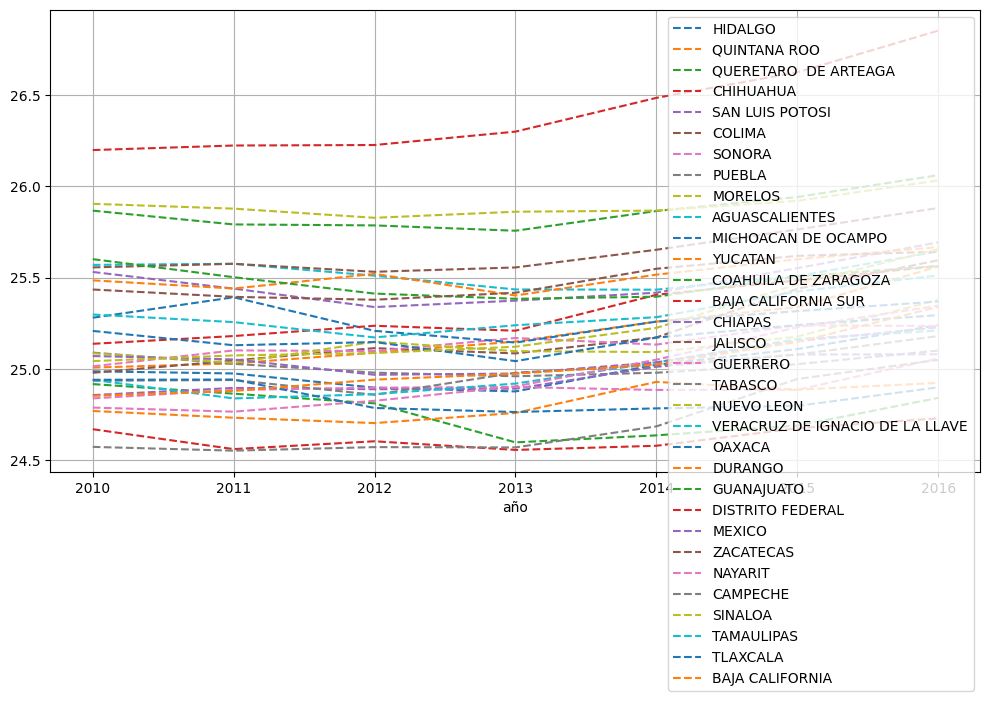

In [243]:
fig = Figure(figsize=(12, 6))
ax = fig.add_subplot()
_df = consulta2.reset_index()
_df.columns = ["_".join(x).rstrip("_") for x in _df.columns.to_flat_index()]
_df = _df.rename(columns={"año_de_nacimiento_vivo": "año"})
edo = "BAJA CALIFORNIA"
for edo in estados_mexicanos:
    _to_plot = _df[(_df["edo_captura"] == edo)][["año", "edad_madre_mean", "edad_madre_std"]]
    _to_plot = _to_plot.set_index("año")
    _to_plot.plot(y="edad_madre_mean", ax=ax, label=edo, linestyle="--", grid=True)


fig

In [180]:
fig = Figure(figsize=(12, 6))
ax = fig.add_subplot()
_df = consulta2.reset_index()
for edo in {x[0] for x in consulta.index.to_list()}:
    _to_plot = _df[(_df["edo_captura"] == edo)
    ][
    [("año_de_nacimiento_vivo", ""), ("edad_madre", "count")]
    ]
    _to_plot.columns = ["Año", "Cantidad"]
    _to_plot = _to_plot.set_index("Año")
    
    _to_plot.plot(y="Cantidad", ax=ax, label=edo, linestyle="--", grid=True)

ax.legend(loc='upper left')
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de Nacimientos")
fig

edad_madre             \
                                                          count       mean   
edo_captura    edo_nac_madre  año_de_nacimiento_vivo                         
AGUASCALIENTES AGUASCALIENTES 2010                        20696  24.986906   
                              2011                        21580  24.995551   
                              2012                        21878  24.886918   
                              2013                        22170  24.847857   
                              2014                        22451  24.871810   
...                                                         ...        ...   
ZACATECAS      ZACATECAS      2012                        25399  25.386590   
                              2013                        25811  25.383441   
                              2014                        25316  25.526900   
                              2015                        25138  25.556846   
                              2016                        25003  25.590809   

                                                                        
                                                           std min max  
edo_captura    edo_nac_madre  año_de_nacimiento_vivo                    
AGUASCALIENTES AGUASCALIENTES 2010                    6.228893  10  52  
                              2011                    6.241311  11  47  
                              2012                    6.231271  12  47  
                              2013                    6.172318  10  52  
                              2014                    6.158577  12  56  
...                                                        ...  ..  ..  
ZACATECAS      ZACATECAS      2012                    6.392179  12  58  
                              2013                    6.385638  11  52  
                              2014                    6.395030  13  56  
                              2015                    6.421693  12  57  
                              2016                    6.399027  10  51  

[8054 rows x 5 columns]

# Filtrar a solo observar los:

## Top GDP

## Agrupación por zonas metropolitanas
